In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
X=pd.read_csv('C:/Users/SUSHANT/Desktop/train.csv')

In [4]:
XT=pd.read_csv('C:/Users/SUSHANT/Desktop/test.csv')

In [5]:
X.head()
#y.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
numeric_features=X.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:20], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-1:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64 

KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


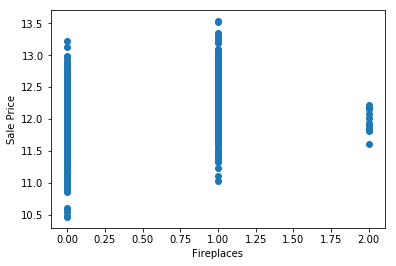

In [7]:
plt.scatter(x=X['HalfBath'], y=np.log(X.SalePrice))
#plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Fireplaces')
plt.show()

In [8]:
X = X[X['GarageArea'] < 1200]
X = X[X['GrLivArea'] < 3800]
X = X[X['TotalBsmtSF'] < 2275]
X = X[X['1stFlrSF'] < 2850]
X = X[X['GarageYrBlt'] > 1910]
X = X[X['Fireplaces'] < 1600]
X = X[X['2ndFlrSF'] < 1850]
#X = X[X['OpenPorchSF'] < 600]
Y=X['SalePrice']

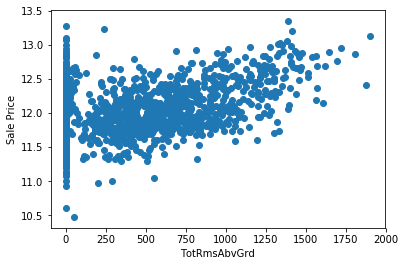

In [9]:
plt.scatter(x=X['BsmtFinSF1'], y=np.log(X.SalePrice))
#plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('TotRmsAbvGrd')
plt.show()

In [10]:
X.drop(['SalePrice'],axis=1);
X.drop(['YrSold'],axis=1);
X.drop(['OverallCond'],axis=1);
X.drop(['MSSubClass'],axis=1);
X.drop(['EnclosedPorch'],axis=1);
X.drop(['MSSubClass'],axis=1);
X.drop(['BsmtFinSF2'],axis=1);
X.drop(['BsmtHalfBath'],axis=1);
X.drop(['MiscVal'],axis=1);
X.drop(['LowQualFinSF'],axis=1);

In [11]:
categoricals = X.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1357,1357,79,1357,1357,1357,1357,1357,1357,1357,...,1357,1357,1357,1357,1357,5,260,50,1357,1357
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1085,1353,40,848,1227,1356,972,1285,219,1177,...,857,599,1292,1307,1272,2,142,46,1179,1123


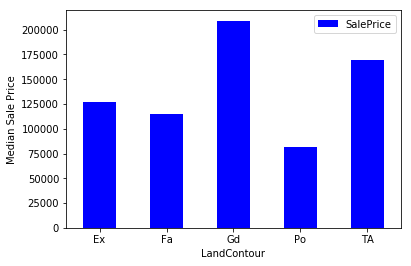

In [12]:
condition_pivot = X.pivot_table(index='GarageQual', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('LandContour')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [13]:
X['enc_street'] = pd.get_dummies(X.Street, drop_first=True)
XT['enc_street'] = pd.get_dummies(XT.Street, drop_first=True)
X['Utilities'] = pd.get_dummies(X.Utilities, X['Utilities'])
XT['Utilities'] = pd.get_dummies(X.Utilities, XT['Utilities'])
X['Alley'] = pd.get_dummies(X.Alley, X['Alley'])
XT['Alley'] = pd.get_dummies(X.Alley, XT['Alley'])
X['GarageQual'] = pd.get_dummies(X.GarageQual, 'GarageQual')
XT['GarageQual'] = pd.get_dummies(X.GarageQual, 'GarageQual')


In [14]:
X['LandContour'].describe()

count     1357
unique       4
top        Lvl
freq      1227
Name: LandContour, dtype: object

In [15]:
X['Alley'].describe()

count    1357.000000
mean        0.029477
std         0.169201
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Alley, dtype: float64

In [16]:
def encode(x): return 1 if x == 'Partial'  else 0
X['enc_condition'] = X.SaleCondition.apply(encode)
XT['enc_condition'] = XT.SaleCondition.apply(encode)

def encode(x): return 1 if x == 'Sev'  else 0
X['enc_LandSlope'] = X.LandSlope.apply(encode)
XT['enc_LandSlope'] = XT.LandSlope.apply(encode)




In [17]:
x1 = X.select_dtypes(include=[np.number]).interpolate().dropna()
x1.enc_condition.value_counts()
x1.shape

(1357, 44)

In [18]:
Y = np.log(Y)
x1 = x1.drop(['Id'], axis=1)
x1=x1.drop(['SalePrice'],axis=1)
x1.head();

In [19]:
sum(x1.isnull().sum() != 0);

In [20]:
x_train,x_val,y_train,y_val=train_test_split(x1,Y,test_size=.33,random_state=42)

In [21]:
#model=LinearRegression()

In [22]:
#LR=model.fit(x_train,y_train)

In [23]:
#from sklearn.ensemble import RandomForestRegressor #For Regression
#clf = RandomForestRegressor(n_estimators=300)
#clf.fit(x_train, y_train)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor #For Regression
clf = GradientBoostingRegressor(n_estimators=100)
clf.fit(x_train, y_train)
#for i in range (-2, 3):
#    alpha = 10**i
#    rm = linear_model.Ridge(alpha=alpha)
#    ridge_model = rm.fit(x_train, y_train)
#    preds_ridge = ridge_model.predict(x_val)
#    print(ridge_model.score(x_val, y_val))
#    print(mean_squared_error(y_val, preds_ridge),"\n")

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [25]:
y_tes=clf.predict(x_val)

In [26]:
clf.score(x_val,y_val)

0.9006952017539072

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_tes)

0.012987637552553125

In [28]:
submission = pd.DataFrame()
submission['Id'] = XT.Id

In [29]:
feats = XT.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
sum(x1.isnull().sum() != 0)

0

In [30]:
predictions = clf.predict(feats)

In [31]:
final_predictions = np.exp(predictions)

In [32]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,127539.715562
1,1462,152411.915746
2,1463,182883.491661
3,1464,183666.083814
4,1465,192313.375810


In [33]:
submission.to_csv('submission2.csv', index=False)

In [35]:
git remote add origin https://github.com/beingsushant/Housing-Prices-kaggle.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-35-31a358eeb078>, line 1)